In [12]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

#  Linear Regression problem

In [20]:
n=100

In [21]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.3612,  1.0000],
        [ 0.3652,  1.0000],
        [ 0.1964,  1.0000],
        [ 0.5782,  1.0000],
        [ 0.5794,  1.0000]])

In [47]:
a = torch.tensor([3.,2]); a

tensor([3., 2.])

In [48]:
y = x@a + torch.rand(n)

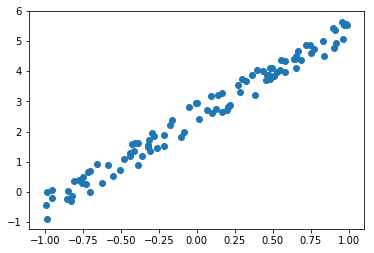

In [49]:
plt.scatter(x[:,0], y);

In [50]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [51]:
a = torch.tensor([-1.,1])

In [52]:
y_hat = x@a
mse(y_hat, y)

tensor(8.2344)

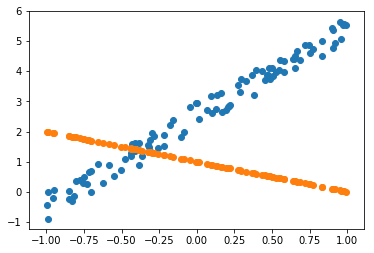

In [53]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

# Gradient Descent

In [62]:
a = torch.tensor([0.1,0.1], requires_grad=True); a

tensor([0.1000, 0.1000], requires_grad=True)

In [65]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [66]:
lr = 1e-1
for t in range(100): update()

tensor(0.0674, grad_fn=<MeanBackward1>)
tensor(0.0674, grad_fn=<MeanBackward1>)
tensor(0.0674, grad_fn=<MeanBackward1>)
tensor(0.0674, grad_fn=<MeanBackward1>)
tensor(0.0674, grad_fn=<MeanBackward1>)
tensor(0.0674, grad_fn=<MeanBackward1>)
tensor(0.0674, grad_fn=<MeanBackward1>)
tensor(0.0674, grad_fn=<MeanBackward1>)
tensor(0.0674, grad_fn=<MeanBackward1>)
tensor(0.0674, grad_fn=<MeanBackward1>)


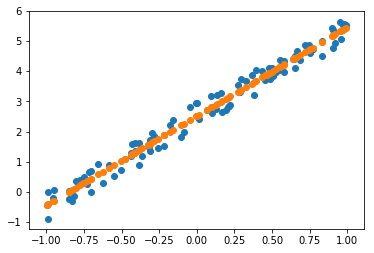

In [67]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [68]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [72]:
# a = nn.Parameter(tensor(-1.,1))
a = torch.tensor([-1., 1], requires_grad=True)

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)